In [1]:
import yfinance as yahoo
import pandas as pd
import numpy as np
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt
comienzo = dt.datetime(2020,8,1)
hoy = dt.datetime.today()

In [2]:
assets = ['BBD.BA','GE.BA','GOLD.BA','KO.BA','NOKA.BA','X.BA']


In [3]:
df = yahoo.download(assets, start=comienzo, end=hoy, interval="15m")['Adj Close'].fillna(method='ffill')

minimal_VaR = pd.DataFrame(index=df.columns)

minimal_VaR['weights'] = [8,7,3,5,6,12]

CVaR = pd.DataFrame(index=df.columns)

CVaR['weights'] = [12,9,1,5,10,18]

portfolio_min = ((df * minimal_VaR.weights).T.sum())

portfolio_cvar = ((df * CVaR.weights).T.sum())

benchmark = df.T.median()

[*********************100%***********************]  6 of 6 completed


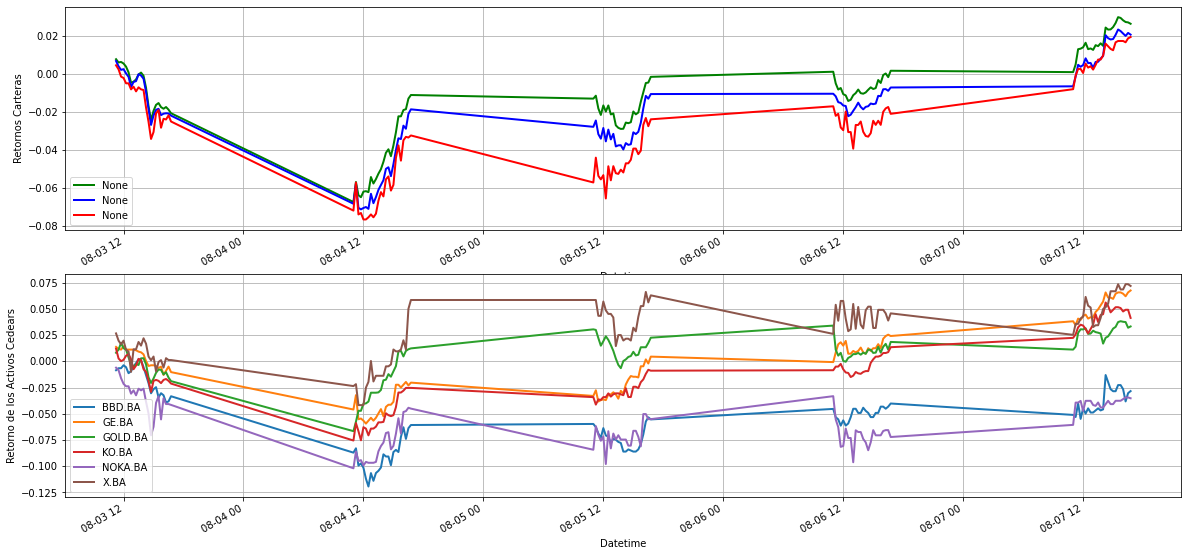

In [4]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211, ylabel='Retornos Carteras')
portfolio_min.pct_change().cumsum().plot(ax=ax1, color='g', lw=2., legend=True)
portfolio_cvar.pct_change().cumsum().plot(ax=ax1, color='b', lw=2., legend=True)
benchmark.pct_change().cumsum().plot(ax=ax1, color='r', lw=2., legend=True)
ax1.grid()
ax2 = fig.add_subplot(212, ylabel='Retorno de los Activos Cedears')
df.pct_change().cumsum().plot(ax=ax2, lw=2., legend=True)
ax2.grid()
plt.show()


In [5]:
min0, min1 = portfolio_min.iloc[0], portfolio_min.iloc[-1]
cvar0, cvar1 = portfolio_cvar.iloc[0], portfolio_cvar.iloc[-1]
ben0, ben1 = benchmark.iloc[0], benchmark.iloc[-1]

rentamin = min1 / min0

rentacvar = cvar1 / cvar0

rentabenchmark = ben1 / ben0

print(rentamin, rentacvar, rentabenchmark)

1.0248565108214756 1.01880434148334 1.016185784658691


In [6]:
start, end = df.iloc[0,:], df.iloc[-1,:]
renta = (end / start)
renta = renta.sort_values(axis=0,ascending=False)
renta

GE.BA      1.067320
X.BA       1.065603
KO.BA      1.038989
GOLD.BA    1.030672
BBD.BA     0.967864
NOKA.BA    0.956555
dtype: float64

In [7]:
portfolio_min

Datetime
2020-08-03 11:00:00-03:00    33452.0
2020-08-03 11:15:00-03:00    33712.5
2020-08-03 11:30:00-03:00    33655.0
2020-08-03 11:45:00-03:00    33663.5
2020-08-03 12:00:00-03:00    33636.0
                              ...   
2020-08-07 15:45:00-03:00    34389.0
2020-08-07 16:00:00-03:00    34346.0
2020-08-07 16:15:00-03:00    34315.0
2020-08-07 16:30:00-03:00    34308.0
2020-08-07 16:45:00-03:00    34283.5
Length: 120, dtype: float64

In [8]:
portfolio_cvar

Datetime
2020-08-03 11:00:00-03:00    34274.0
2020-08-03 11:15:00-03:00    34508.5
2020-08-03 11:30:00-03:00    34412.0
2020-08-03 11:45:00-03:00    34347.5
2020-08-03 12:00:00-03:00    34360.0
                              ...   
2020-08-07 15:45:00-03:00    34984.0
2020-08-07 16:00:00-03:00    34939.0
2020-08-07 16:15:00-03:00    34895.0
2020-08-07 16:30:00-03:00    34950.0
2020-08-07 16:45:00-03:00    34918.5
Length: 120, dtype: float64

In [9]:
benchmark.pct_change().cumsum()

Datetime
2020-08-03 11:00:00-03:00         NaN
2020-08-03 11:15:00-03:00    0.004574
2020-08-03 11:30:00-03:00    0.002473
2020-08-03 11:45:00-03:00   -0.001388
2020-08-03 12:00:00-03:00   -0.002093
                               ...   
2020-08-07 15:45:00-03:00    0.017386
2020-08-07 16:00:00-03:00    0.017386
2020-08-07 16:15:00-03:00    0.016692
2020-08-07 16:30:00-03:00    0.018776
2020-08-07 16:45:00-03:00    0.019469
Length: 120, dtype: float64